# 5 Modelling and optimisation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#5-Modelling-and-optimisation" data-toc-modified-id="5-Modelling-and-optimisation-1">5 Modelling and optimisation</a></span><ul class="toc-item"><li><span><a href="#5.1-Get-datasets" data-toc-modified-id="5.1-Get-datasets-1.1">5.1 Get datasets</a></span></li></ul></li></ul></div>

## 5.1 Get datasets

We first get the datasets we will need.

These are the MODIS LAI data and associated ECMWF temperature data. Both datasets are available in `npz` files that we have previously generated.

In [3]:
# required general imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline
import numpy as np
import sys
import os
from pathlib import Path
import gdal
from datetime import datetime, timedelta

In [1]:
from geog0111.geog_data import procure_dataset
import numpy as np
from pathlib import Path

year = 2017
country_code = 'GM'
'''
LAI data
'''
# read in the LAI data for given country code
lai_filename = f'data/lai_data_{year}_{country_code}.npz'
# get the dataset in case its not here
procure_dataset(Path(lai_filename).name,verbose=False)

lai = np.load(lai_filename)
print(lai_filename,list(lai.keys()))

'''
T 2m data
'''
t2_filename = f'data/europe_data_{year}_{country_code}.npz'
# get the dataset in case its not here
procure_dataset(Path(t2_filename).name,verbose=False)
t2data = np.load(t2_filename)
print(t2_filename,list(t2data.keys()))

data/lai_data_2017_GM.npz ['dates', 'lai', 'weights', 'interpolated_lai']
data/europe_data_2017_GM.npz ['timer', 'temp2', 'extent']


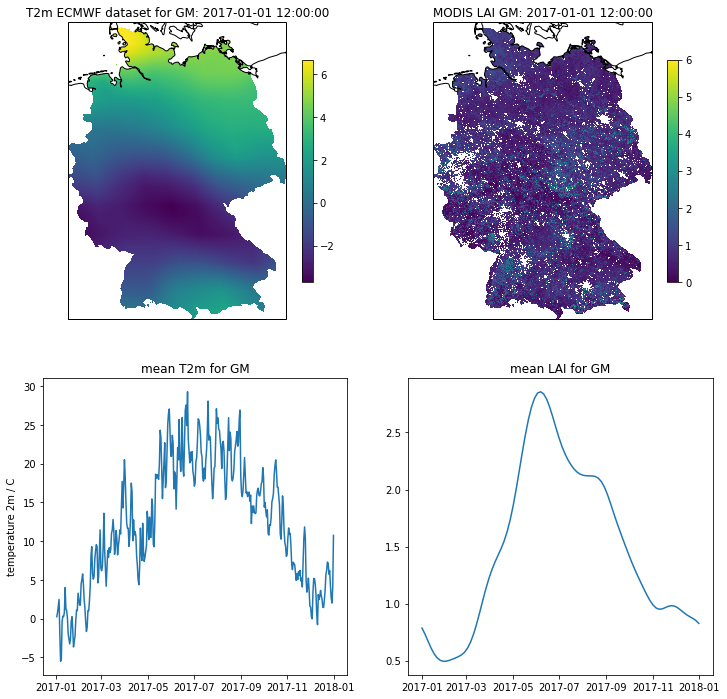

In [10]:
# visualise the interpolated dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
%matplotlib inline

plt.figure(figsize=(12,12))
ax = plt.subplot ( 2, 2, 1 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'T2m ECMWF dataset for {country_code}: {str(t2data["timer"][0])}')
im = ax.imshow(t2data['temp2'][0],extent=t2data['extent'])
plt.colorbar(im,shrink=0.75)

ax = plt.subplot ( 2, 2, 2 ,projection=ccrs.Sinusoidal.MODIS)
ax.coastlines('10m')
ax.set_title(f'MODIS LAI {country_code}: {str(t2data["timer"][0])}')
im = plt.imshow(lai['interpolated_lai'][:,:,0],vmax=6,extent=t2data['extent'])
_ = plt.colorbar(im,shrink=0.75)

plt.subplot ( 2, 2, 3 )
plt.title(f'mean T2m for {country_code}')
plt.plot(t2data['timer'],np.nanmean(t2data['temp2'],axis=(1,2)))
plt.ylabel('temperature 2m / C')
plt.subplot ( 2, 2, 4 )
plt.title(f'mean LAI for {country_code}')
mean = np.nanmean(lai['interpolated_lai'],axis=(0,1))
plt.plot(t2data['timer'][::4],mean)

In [ ]:
for year in [2017]:
      for country_code in ['NL', 'GM', 'SP', 'LU', 'FR', 'BE', 'DA']:
          %run geog0111/Chapter3_6A_prerequisites.py $country_code $year
          %run geog0111/Chapter3_6.py $country_code $year

2017 UK
europe_data_2016_2017.nc exists
GEOGCS["Coordinate System imported from GRIB file",DATUM["unknown",SPHEROID["Sphere",6371200,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]
PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.01745329251994328,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["false_easting",0.0],PARAMETER["false_northing",0.0],PARAMETER["central_meridian",0.0],PARAMETER["semi_major",6371007.181],PARAMETER["semi_minor",6371007.181],UNIT["m",1.0],AUTHORITY["SR-ORG","6974"]]
